In [2]:
!pip install researchpy

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [5]:
bike_data = pd.read_csv('datasets/day.csv')

In [6]:
bike_data.shape

(731, 16)

In [7]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
bike_data = bike_data[['season',
                      'mnth',
                      'holiday',
                      'workingday',
                      'weathersit',
                      'temp',
                      'cnt']]

In [10]:
bike_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [11]:
bike_data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [12]:
bike_data['workingday'].unique()

array([0, 1], dtype=int64)

In [13]:
bike_data['holiday'].unique()

array([0, 1], dtype=int64)

In [14]:
bike_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [16]:
bike_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [17]:
bike_data.shape

(731, 7)

In [18]:
#groupby

In [19]:
bike_data['workingday'].unique()


array([0, 1], dtype=int64)

In [20]:
bike_data.groupby('workingday')

In [24]:
bike_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


<Axes: title={'center': 'cnt'}, xlabel='workingday'>

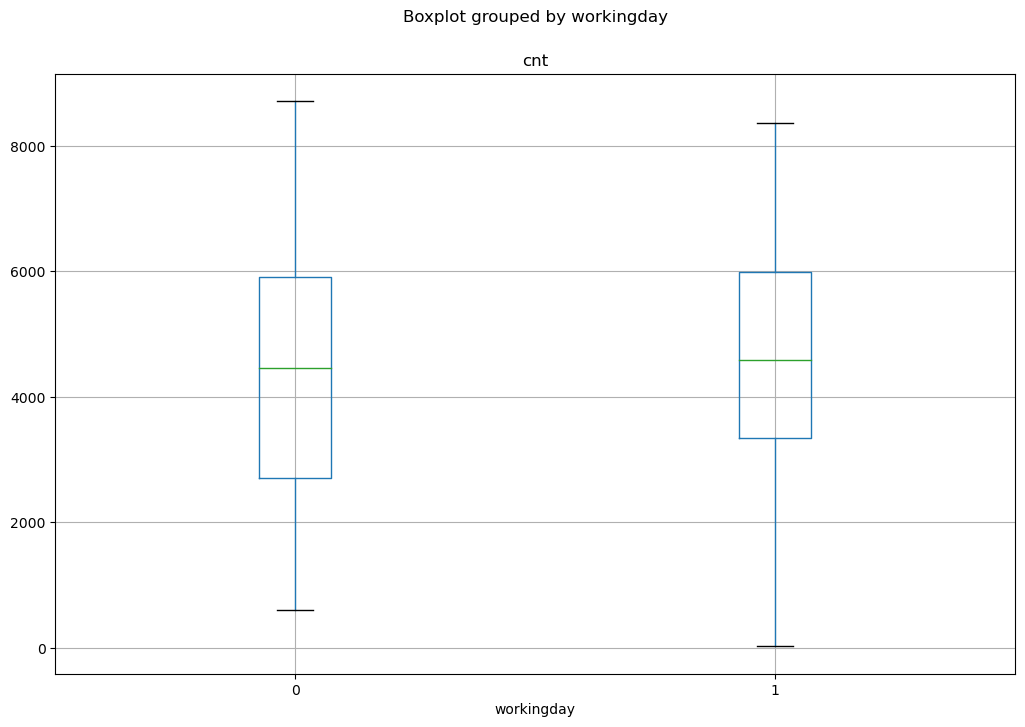

In [26]:
bike_data.boxplot(column='cnt', by='workingday',figsize=(12,8))

In [ ]:
#Normal distribution checking difference between two pair points

In [35]:
samp1 = bike_data[(bike_data['workingday']==1)]
samp2 = bike_data[(bike_data['workingday']==0)]


LeveneResult(statistic=4.345365092777056, pvalue=0.037457323247039445)

samp1.shape,samp2.shape

In [37]:
samp1.shape,samp2.shape

((500, 7), (231, 7))

In [39]:
samp1=samp1.sample(231)

samp1.shape,samp2.shape

((231, 7), (231, 7))

C:\Users\aerap\AppData\Local\Temp\ipykernel_15824\1452732536.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  diff = scale(np.array(samp1['cnt']) - np.array(samp2['cnt'], dtype=np.float))


(array([ 7., 12., 19., 33., 41., 37., 41., 26., 11.,  4.]),
 array([-2.45476129, -1.96844625, -1.48213121, -0.99581617, -0.50950113,
        -0.02318609,  0.46312895,  0.94944399,  1.43575903,  1.92207407,
         2.40838911]),
 <BarContainer object of 10 artists>)

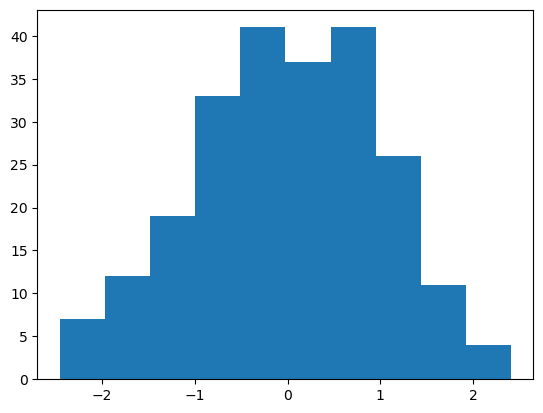

In [40]:
diff = scale(np.array(samp1['cnt']) - np.array(samp2['cnt'], dtype=np.float))

plt.hist(diff)

In [41]:
#null hypthesis (H0): u1=u2 mean samp1 = mean samp2

In [42]:
#alternative hypothesis (H1): u1 ? u2 mean samp1 /= mean samp2

In [1]:
plt.figure(figsize=(12,8))
stats.probplot(diff,plot=plt, dist='norm')
plt.show()

NameError: name 'plt' is not defined

SyntaxError: invalid syntax (1255402559.py, line 1)